In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("C:/Users/HP/Downloads/flight_price.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [9]:
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [10]:
df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [11]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [12]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df['Day_of_journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Month_of_journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [15]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [16]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
df['Dept_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1, inplace=True)

In [18]:
df['Arrv_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrv_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1, inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dept_hour,Dept_min,Arrv_hour,Arrv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Day_of_journey    10683 non-null  int32 
 9   Month_of_journey  10683 non-null  int32 
 10  Dept_hour         10683 non-null  int32 
 11  Dept_min          10683 non-null  int32 
 12  Arrv_hour         10683 non-null  int32 
 13  Arrv_min          10683 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 918.2+ KB


<Axes: xlabel='Price', ylabel='Airline'>

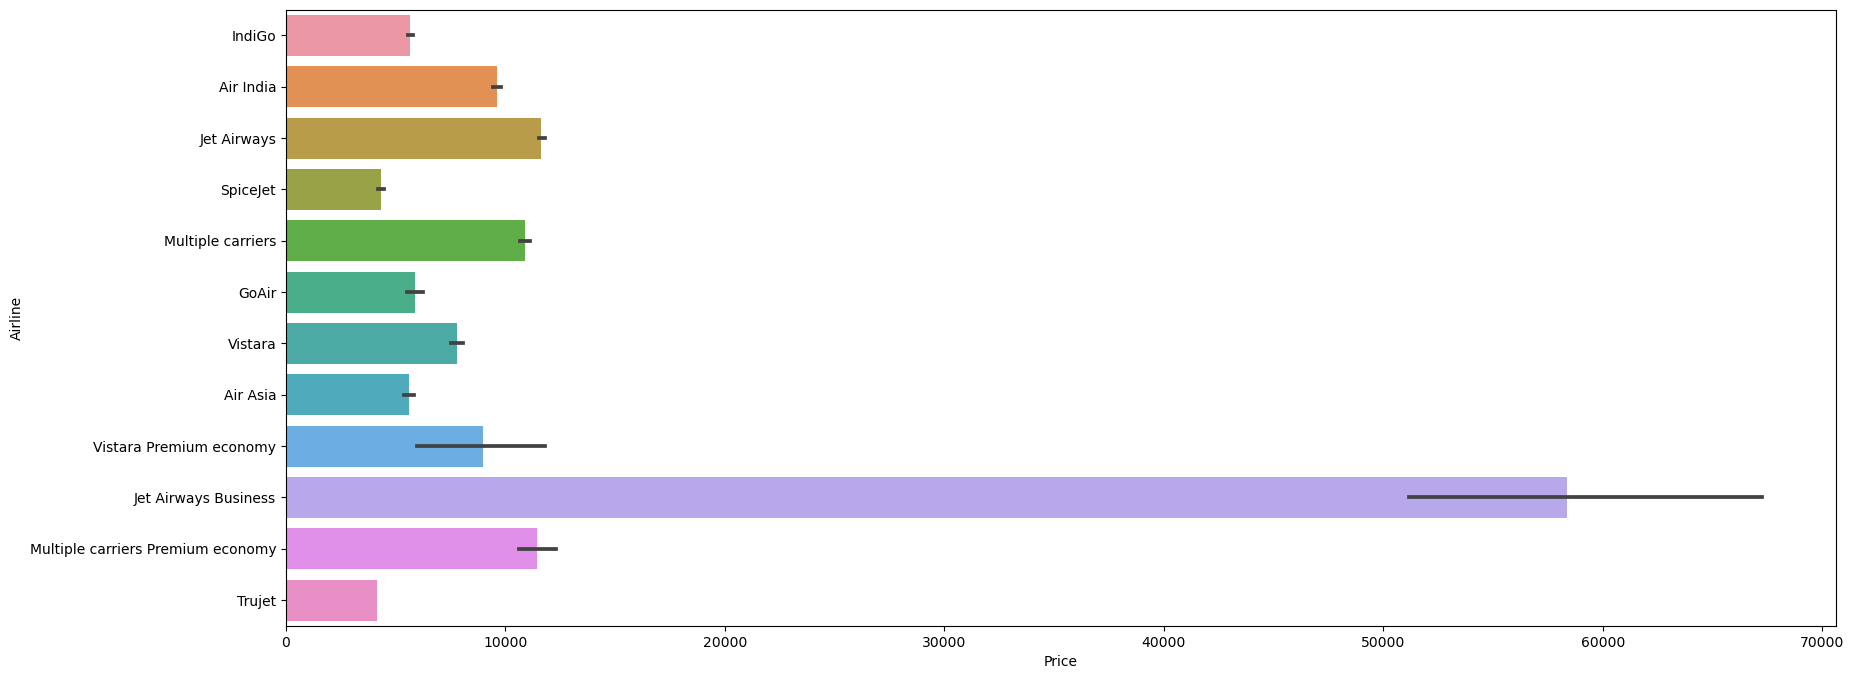

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x='Price', y='Airline', data=df)

<Axes: xlabel='Price', ylabel='Airline'>

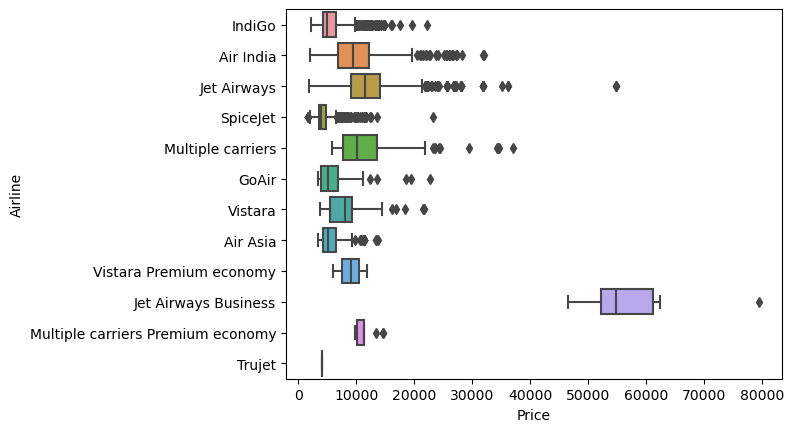

In [22]:
sns.boxplot(x='Price', y='Airline', data=df)

<Axes: xlabel='Duration', ylabel='Price'>

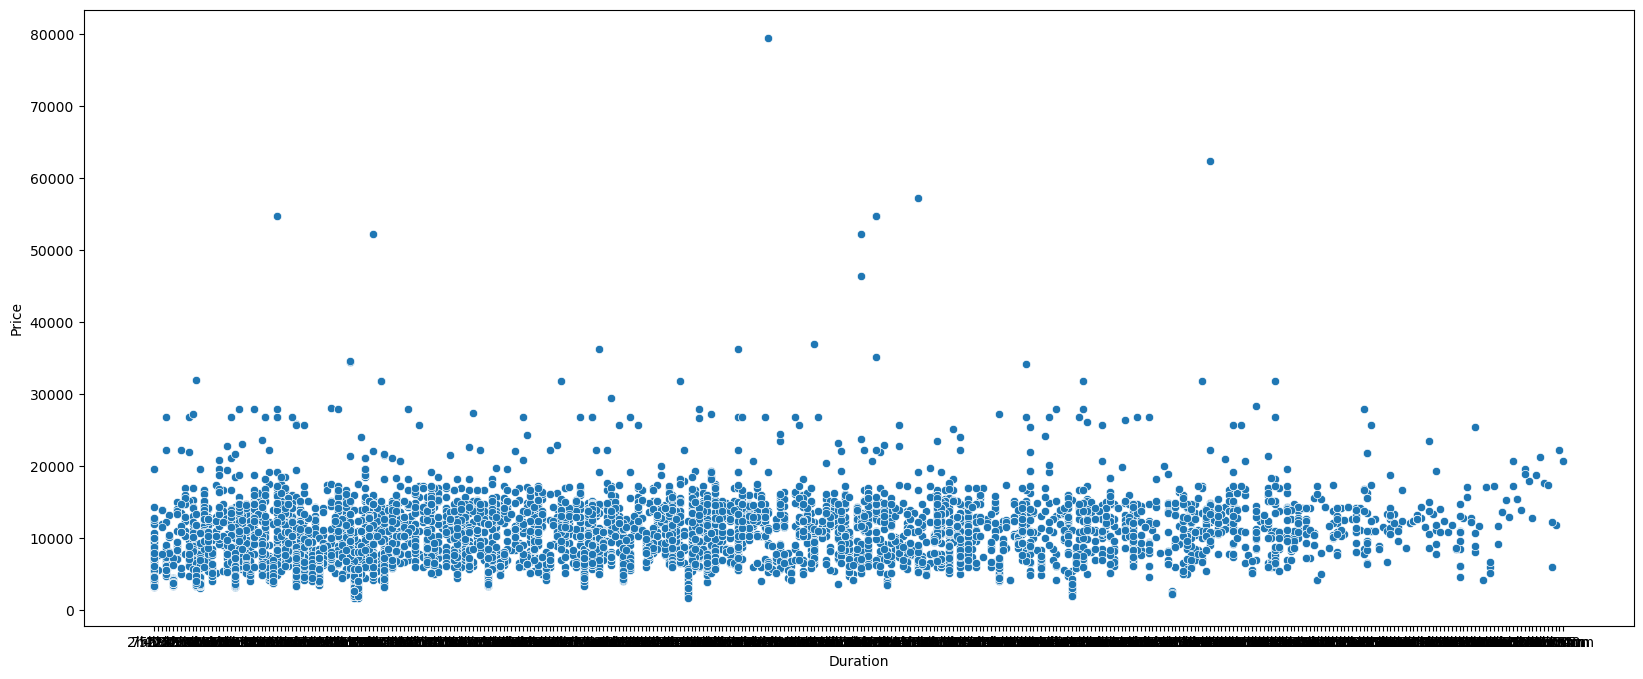

In [24]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Duration', y='Price', data=df)

In [25]:
def extract_hours(duration):
    if 'h' in duration:
        return int(duration.split('h')[0].strip())
    else:
        return 0
def extract_minutes(duration):
    if 'm' in duration:
        parts = duration.split(' ')
        for part in parts:
            if 'm' in part:
                return int(part.replace('m', '').strip())
    return 0

In [26]:
df['Duration_hour'] = df['Duration'].apply(extract_hours)
df['Duration_min'] = df['Duration'].apply(extract_minutes)

In [27]:
df.drop('Duration', axis=1, inplace=True)
df.drop('Route', axis=1, inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dept_hour,Dept_min,Arrv_hour,Arrv_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
df = pd.get_dummies(df, columns=['Airline'], drop_first=False)

In [30]:
df = pd.get_dummies(df, columns=['Source'], drop_first=False)
df = pd.get_dummies(df, columns=['Destination'], drop_first=False)

In [31]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [33]:
df.head()

,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,Dept_hour,Dept_min,Arrv_hour,Arrv_min,Duration_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,No info,3897,24,3,22,20,1,10,2,...,False,False,False,False,False,False,False,False,False,True
1,2.0,No info,7662,1,5,5,50,13,15,7,...,False,False,True,False,True,False,False,False,False,False
2,2.0,No info,13882,9,6,9,25,4,25,19,...,False,True,False,False,False,True,False,False,False,False
3,1.0,No info,6218,12,5,18,5,23,30,5,...,False,False,True,False,True,False,False,False,False,False
4,1.0,No info,13302,1,3,16,50,21,35,4,...,False,False,False,False,False,False,False,False,False,True


In [34]:
df = df.dropna(subset=['Total_Stops'])

In [35]:
df.isnull().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
Day_of_journey                               0
Month_of_journey                             0
Dept_hour                                    0
Dept_min                                     0
Arrv_hour                                    0
Arrv_min                                     0
Duration_hour                                0
Duration_min                                 0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

In [36]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No info')

In [37]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [38]:
df.drop('Additional_Info' , axis=1, inplace=True)

In [42]:
df.shape

(10682, 33)

In [43]:
df.head()

,Total_Stops,Price,Day_of_journey,Month_of_journey,Dept_hour,Dept_min,Arrv_hour,Arrv_min,Duration_hour,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2.0,7662,1,5,5,50,13,15,7,25,...,False,False,True,False,True,False,False,False,False,False
2,2.0,13882,9,6,9,25,4,25,19,0,...,False,True,False,False,False,True,False,False,False,False
3,1.0,6218,12,5,18,5,23,30,5,25,...,False,False,True,False,True,False,False,False,False,False
4,1.0,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [44]:
X = df.drop('Price', axis=1)  
y = df['Price']               

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:32
   ---------------------------------------- 0.1/150.0 MB 653.6 kB/s eta 0:03:50
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:11
   ---------------------------------------- 0.4/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 0.4/150.0 MB 1.5 MB/s eta 0:01:39
   ---------------------------------------- 0.8/150.0 MB 2.3 MB/s eta 0:01:05
   ---------------------------------------- 1.0/150.0 MB 2.5 MB/s eta 0:01:00
   ---------------------------------------- 1.1/150.0 MB 2.1 MB/s eta 0:01:11
   ----------------------

In [48]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}
from sklearn.metrics import r2_score

print("Model Performance (R² Score):\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name}: {score:.4f}")


Model Performance (R² Score):

Linear Regression: 0.6196
Decision Tree: 0.7304
Random Forest: 0.7975
XGBoost: 0.8476


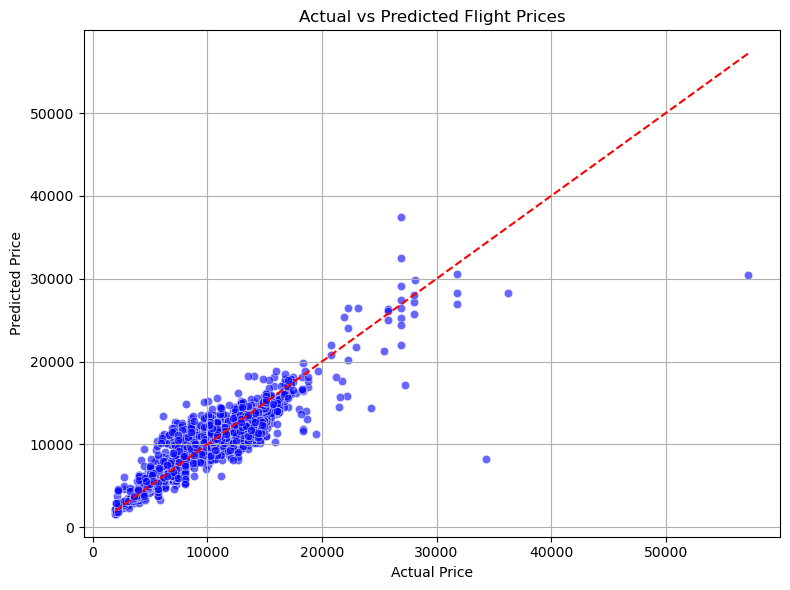

In [52]:
best_model = models['XGBoost']  
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


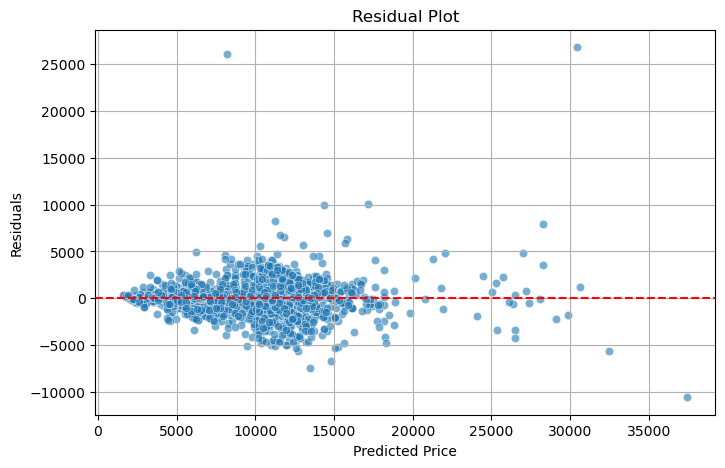

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


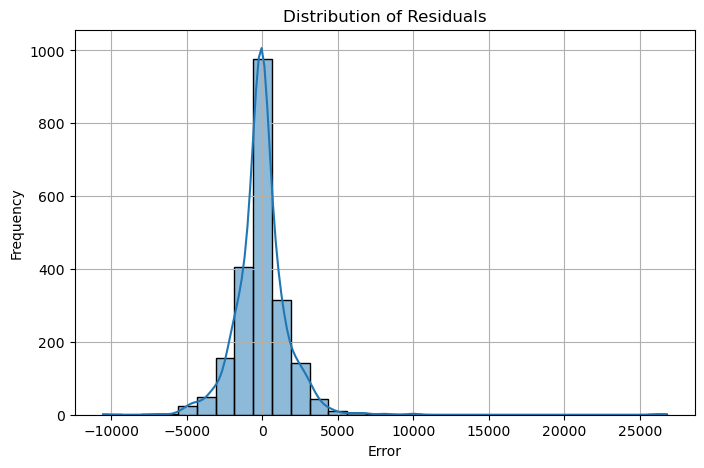

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


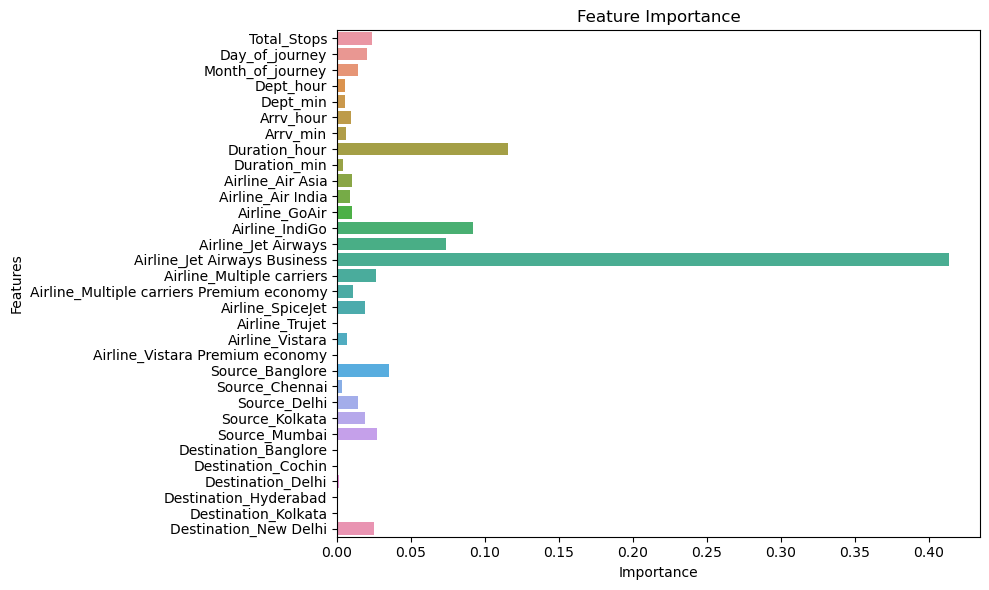

In [56]:
importances = best_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [64]:
!pip install pandas numpy scikit-learn joblib


In [63]:

import joblib
joblib.dump(models['XGBoost'], 'flight_xg_model.pkl')
joblib.dump(X.columns, 'flight_features.pkl')

import gradio as gr
import pandas as pd

# Load model and feature columns
model = joblib.load('flight_xg_model.pkl')
feature_cols = joblib.load('flight_features.pkl')

def predict_price(day, month, dept_hour, dept_min, arr_hour, arr_min, dur_hour, dur_min, stops,
                  airline, source, destination):
    input_dict = {
        'Day_of_journey': day,
        'Month_of_journey': month,
        'Dept_hour': dept_hour,
        'Dept_min': dept_min,
        'Arrv_hour': arr_hour,
        'Arrv_min': arr_min,
        'Duration_hour': dur_hour,
        'Duration_min': dur_min,
        'Total_Stops': stops
    }

    for col in [col for col in feature_cols if col.startswith('Airline_')]:
        input_dict[col] = 1 if col == f'Airline_{airline}' else 0

    for col in [col for col in feature_cols if col.startswith('Source_')]:
        input_dict[col] = 1 if col == f'Source_{source}' else 0

    for col in [col for col in feature_cols if col.startswith('Destination_')]:
        input_dict[col] = 1 if col == f'Destination_{destination}' else 0

    input_df = pd.DataFrame([input_dict])
    input_df = input_df.reindex(columns=feature_cols, fill_value=0)

    prediction = model.predict(input_df)[0]
    return f"Predicted Flight Price: ₹ {int(prediction)}"

# Extract dropdown options
airlines = [col.replace('Airline_', '') for col in feature_cols if col.startswith('Airline_')]
sources = [col.replace('Source_', '') for col in feature_cols if col.startswith('Source_')]
destinations = [col.replace('Destination_', '') for col in feature_cols if col.startswith('Destination_')]

iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Day of Journey"),
        gr.Number(label="Month of Journey"),
        gr.Number(label="Departure Hour"),
        gr.Number(label="Departure Minute"),
        gr.Number(label="Arrival Hour"),
        gr.Number(label="Arrival Minute"),
        gr.Number(label="Duration Hour"),
        gr.Number(label="Duration Minute"),
        gr.Number(label="Total Stops"),
        gr.Dropdown(airlines, label="Airline"),
        gr.Dropdown(sources, label="Source"),
        gr.Dropdown(destinations, label="Destination")
    ],
    outputs="text",
    title="Flight Price Prediction"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [67]:
import pickle
best_model = models['Random Forest']

# Save the trained model to a pickle file
with open('Flight_Price_Prediction.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as Flight_Price_Prediction.pkl")

Model saved as Flight_Price_Prediction.pkl


In [70]:
with open(r'C:/Users/HP/Downloads/Flight_Price_Prediction.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as Flight_Price_Prediction.pkl")

Model saved successfully as Flight_Price_Prediction.pkl
